## David Saavedra Fernández

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Importación de datos
X_train = pd.read_csv('https://raw.githubusercontent.com/dsf0211/Actividad_3_6_DengAI_prediccion_de_la_propagacion_de_enfermedades_David_Saavedra_Fernandez/refs/heads/main/dengue_features_train.csv', sep=',')
y_train = pd.read_csv('https://raw.githubusercontent.com/dsf0211/Actividad_3_6_DengAI_prediccion_de_la_propagacion_de_enfermedades_David_Saavedra_Fernandez/refs/heads/main/dengue_labels_train.csv', sep=',')['total_cases']
X_test = pd.read_csv('https://raw.githubusercontent.com/dsf0211/Actividad_3_6_DengAI_prediccion_de_la_propagacion_de_enfermedades_David_Saavedra_Fernandez/refs/heads/main/dengue_features_test.csv', sep=',')

In [32]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pand

In [40]:
# Resumen estadístico de los datos de entrenamiento y validación
from skimpy import skim
skim(X_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1456   │ │ float64     │ 20    │                                                          │
│ │ Number of columns │ 24     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA  ┃ NA %        ┃ mean   ┃ sd      ┃ p0       ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ year       │   0 │           0 │   2001 │   5.408 │     1990 │    1997 │   2002 │   2005 │   2010 │ ▄▃▃█▆▅ │  │
│ │ weekofyear │   0 │           0 │   26.5 │   15.02 │        1 │   13.75 │   26.5 │  39.25 │     53 │ ██▇██▇ │  │
│ │ ndvi_ne    │ 194 │ 13.32417582 │ 0.1423 │  0.1405 │  -0.4062 │ 0.04495 │ 0.1288 │ 0.2485 │ 0.5084 │  ▁▅█▆▁ │  │
│ │            │     │     4175825 │        │         │          │         │        │        │        │        │  │
│ │ ndvi_nw    │  52 │ 3.571428571 │ 0.1306 │    0.12 │  -0.4561 │ 0.04922 │ 0.1214 │ 0.2166 │ 0.4544 │   ▂█▆▁ │  │
│ │            │     │     4285716 │        │         │          │         │        │        │        │        │  │
│ │ ndvi_se    │  22 │ 1.510989010 │ 0.2038 │ 0.07386 │ -0.01553 │  0.1551 │ 0.1961 │ 0.2488 │ 0.5383 │  ▅█▃▁  │  │
│ │            │     │      989011 │        │         │          │         │        │        │        │        │  │
│ │ ndvi_sw    │  22 │ 1.510989010 │ 0.2023 │  0.0839 │ -0.06346 │  0.1442 │ 0.1895 │  0.247 │  0.546 │  ▄█▃▁  │  │
│ │            │     │      989011 │        │         │          │         │        │        │        │        │  │
│ │ precipitat │  13 │ 0.892857142 │  45.76 │   43.72 │        0 │     9.8 │  38.34 │  70.23 │  390.6 │   █▃   │  │
│ │ ion_amt_mm │     │     8571429 │        │         │          │         │        │        │        │        │  │
│ │ reanalysis │  10 │ 0.686813186 │  298.7 │   1.362 │    294.6 │   297.7 │  298.6 │  299.8 │  302.2 │  ▃█▇▆▁ │  │
│ │ _air_temp_ │     │     8131868 │        │         │          │         │        │        │        │        │  │
│ │ k          │     │             │        │         │          │         │        │        │        │        │  │
│ │ reanalysis │  10 │ 0.686813186 │  299.2 │   1.262 │    294.9 │   298.3 │  299.3 │  300.2 │  302.9 │  ▂▇█▅  │  │
│ │ _avg_temp_ │     │     8131868 │        │         │          │         │        │        │        │        │  │
│ │ k          │     │             │        │         │          │         │        │        │        │        │  │
│ │ reanalysis │  10 │ 0.686813186 │  295.2 │   1.528 │    289.6 │   294.1 │  295.6 │  296.5 │  298.4 │  ▁▃▄█▁ │  │
│ │ _dew_point │     │     8131868 │        │         │          │         │        │        │        │        │  │
│ │ _temp_k    │     │             │        │         │          │         │        │        │        │        │  │
│ │ reanalysis │  10 │ 0.686813186 │  303.4 │   3.235 │ 

In [41]:
# Usar el valor anterior disponible para todos los valores no informados en datos de train y test

X_train.fillna(method="ffill", inplace=True)
X_test.fillna(method="ffill", inplace=True)

<ipython-input-41-002f32914802>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train.fillna(method="ffill", inplace=True)
<ipython-input-41-002f32914802>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test.fillna(method="ffill", inplace=True)


In [42]:
# Convertir columnas categóricas a numéricas en los datos de train y test
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_train['city'] = encoder.fit_transform(X_train['city'])
X_train['week_start_date'] = encoder.fit_transform(X_train['week_start_date'])

X_test['city'] = encoder.fit_transform(X_test['city'])
X_test['week_start_date'] = encoder.fit_transform(X_test['week_start_date'])

In [45]:
# Columnas con valores negativos en X_train
columns_with_negative_values_X_train = X_train.columns[(X_train < 0).any()]
columns_with_negative_values_X_train

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], dtype='object')

In [46]:
# Columnas con valores negativos en X_test
columns_with_negative_values_X_test = X_test.columns[(X_test < 0).any()]
columns_with_negative_values_X_test

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_sw'], dtype='object')

In [47]:
# Transformar valores negativos a valores positivos (0 a 1) en train y test
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[columns_with_negative_values_X_train])
X_train[columns_with_negative_values_X_train] = scaler.transform(X_train[columns_with_negative_values_X_train])

scaler.fit(X_test[columns_with_negative_values_X_test])
X_test[columns_with_negative_values_X_test] = scaler.transform(X_test[columns_with_negative_values_X_test])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


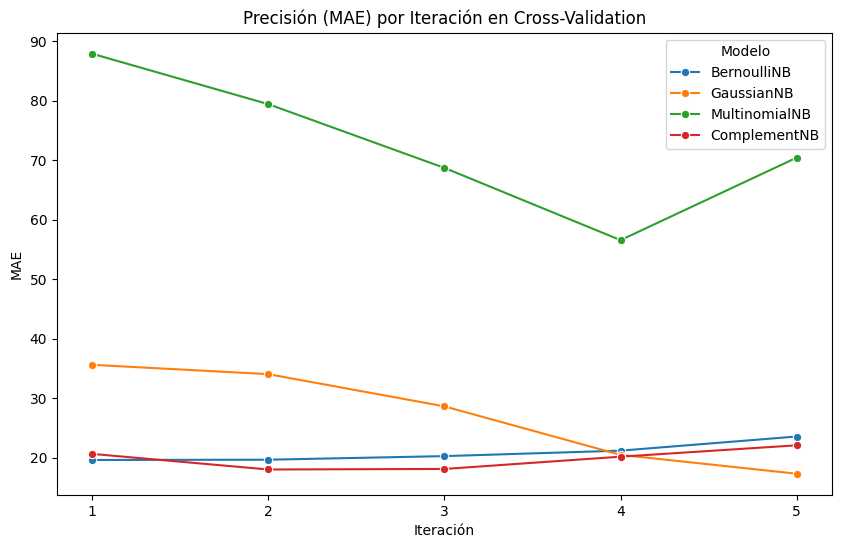

{'BernoulliNB': 20.83121028103375,
 'GaussianNB': 27.189283528691806,
 'MultinomialNB': 72.59869604104881,
 'ComplementNB': 19.77621098714871}

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

# Implementar CrossValidation a los modelos de Naive Bayes
evaluations_cv = {}
models = {
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
}

# Almacenar los resultados para el gráfico
results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    evaluations_cv[model_name] = -scores.mean()
    for i, score in enumerate(scores):
        results.append([model_name, i + 1, -score])

# Crear un DataFrame para facilitar el gráfico
import pandas as pd
results_df = pd.DataFrame(results, columns=['Modelo', 'Iteración', 'MAE'])

# Crear el diagrama
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteración', y='MAE', hue='Modelo', data=results_df, marker='o')
plt.title('Precisión (MAE) por Iteración en Cross-Validation')
plt.xlabel('Iteración')
plt.ylabel('MAE')
plt.xticks(results_df['Iteración'].unique())
plt.show()

evaluations_cv

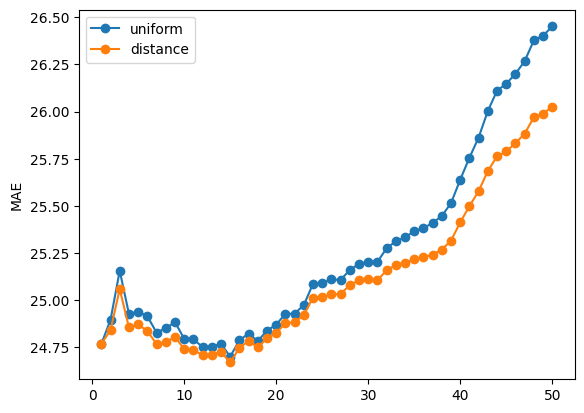

{'uniform': ['24.700432456181645', '15'], 'distance': ['24.66928477958526', '15']}


In [50]:
# Implementar CrossValidation al modelo KNN
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

k_values = range(1, 51)
max_values = {}
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in k_values:
       model = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
       total_scores.append(-scores.mean())
   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   max_values[weights] = [str(min(total_scores)), str(np.argmin(total_scores) + 1)]
   plt.ylabel('MAE')
plt.legend()
plt.show()
print(max_values)

Mejor valor  :18.417756525076996 (5)


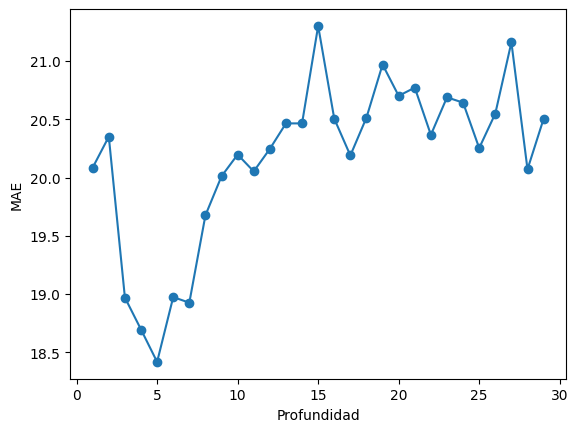

In [51]:
# Implementar CrossValidation al modelo DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

total_scores = []
for i in range(1,30):
    fold_accuracy = []
    model = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    total_scores.append(-scores.mean())
plt.plot(range(1,len(total_scores)+1), total_scores,
           marker='o')
print ('Mejor valor  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')
plt.xlabel('Profundidad')
plt.show()

final_depth = np.argmin(total_scores) + 1

<Axes: >

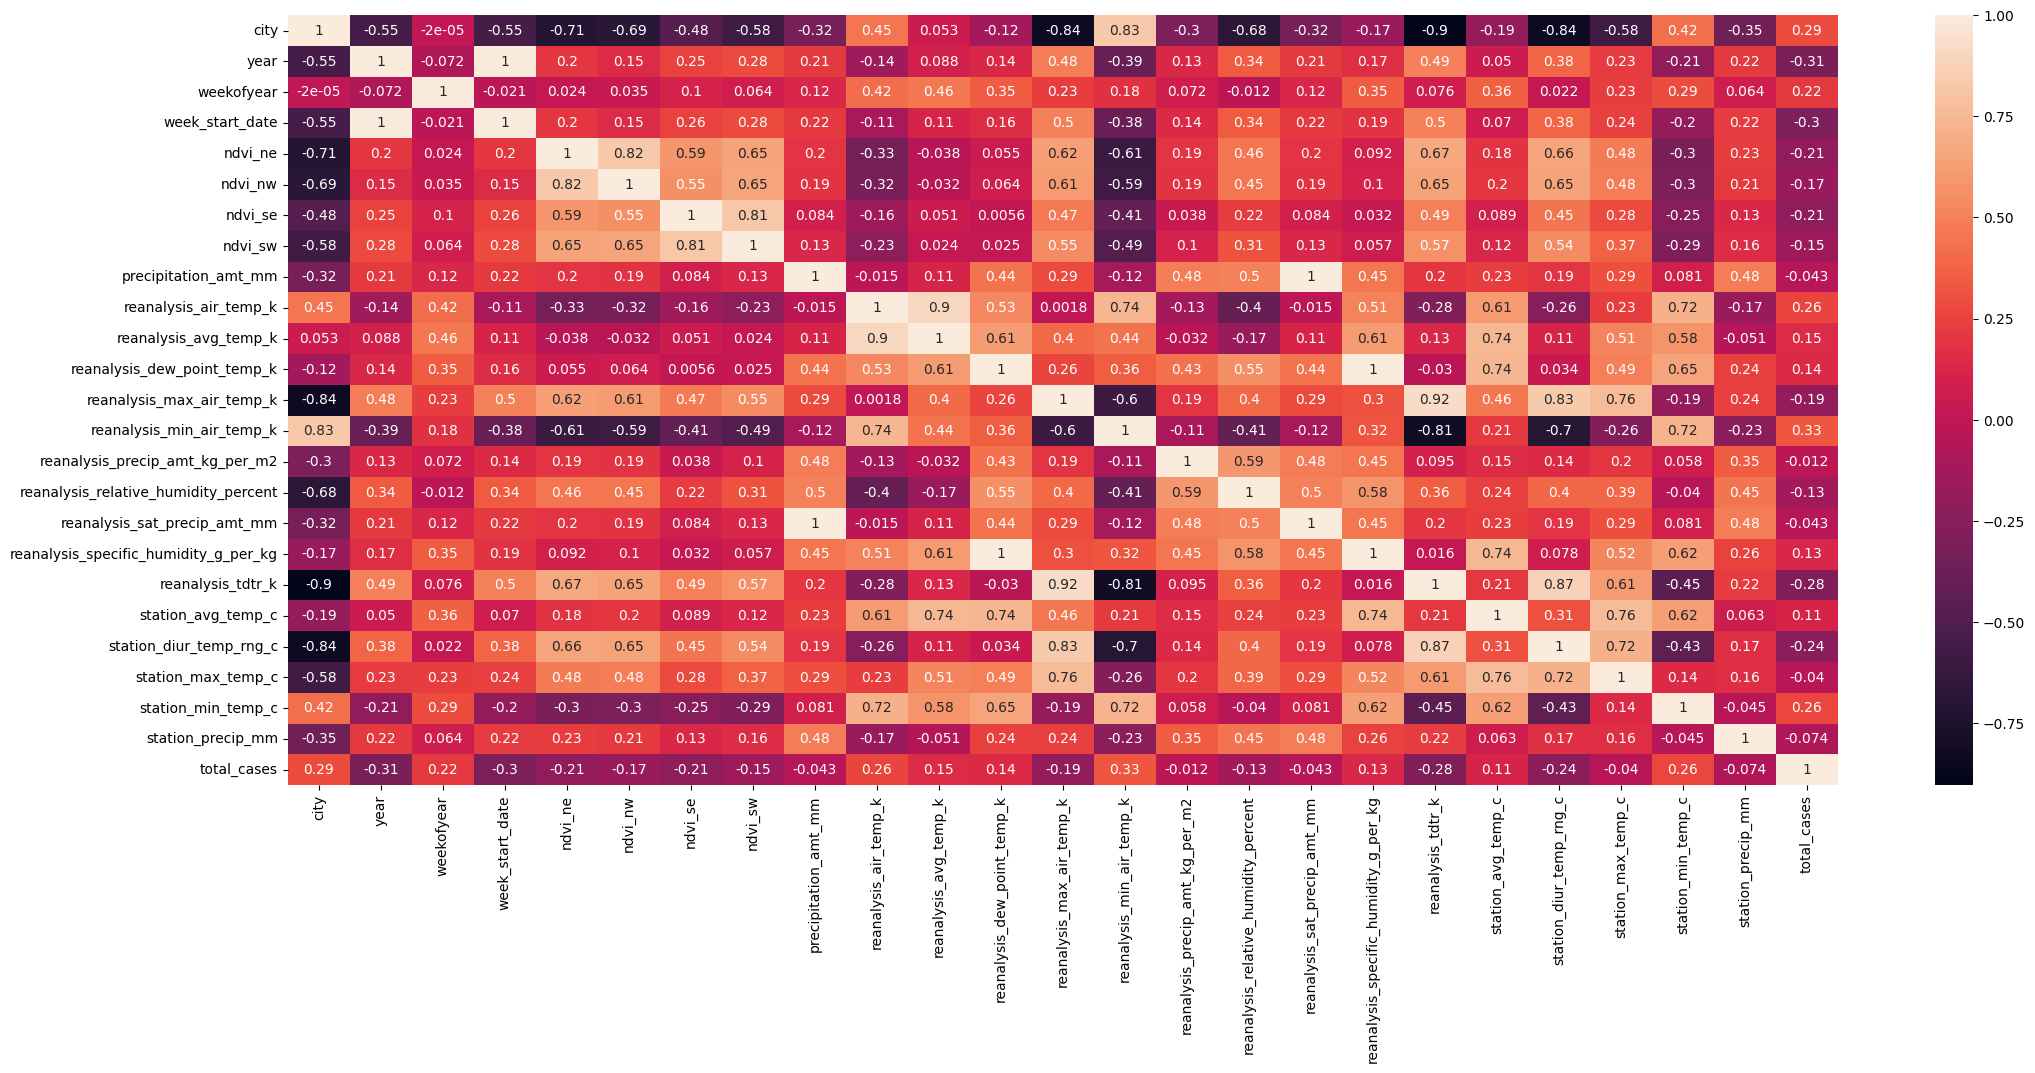

In [53]:
# Mostrar diagrama de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True)

In [54]:
from sklearn.model_selection import train_test_split

# Define un valor para random_state
random_state = 42

# Divide X_train en X_train_val y X_val
X_train_val, X_val = train_test_split(X_train, test_size=0.25, random_state=random_state)

# Divide y_train en y_train_val e y_val usando el mismo random_state
y_train_val, y_val = train_test_split(y_train, test_size=0.25, random_state=random_state)

In [56]:
selected_features = {}

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

for i in range(7):
  # Selección de características con RFE
  rf = RandomForestRegressor()
  rfe = RFE(rf, n_features_to_select=i + 1)
  X_train_val_selected = rfe.fit_transform(X_train_val, y_train_val)
  X_val_selected = rfe.transform(X_val)

  # Constructor
  model = DecisionTreeRegressor(max_depth = final_depth)

  # Entrenar y predecir
  model.fit(X_train_val_selected, y_train_val)
  y_pred_val = model.predict(X_val_selected)

  # Calcular MAE
  mae = mean_absolute_error(y_val, y_pred_val)
  selected = rfe.get_feature_names_out(X_train_val.columns)
  selected_features[tuple(selected)] = mae

In [58]:
from sklearn.feature_selection import SelectKBest

for i in range(7):
  # Selección de características con SelectKBest
  kbest = SelectKBest(k=i + 1)
  X_train_val_selected = kbest.fit_transform(X_train_val, y_train_val)
  X_val_selected = kbest.transform(X_val)

  # Constructor
  model = DecisionTreeRegressor(max_depth = final_depth)

  # Entrenar y predecir
  model.fit(X_train_val_selected, y_train_val)
  y_pred_val = model.predict(X_val_selected)

  # Calcular MAE
  mae = mean_absolute_error(y_val, y_pred_val)
  selected = rfe.get_feature_names_out(X_train_val.columns)
  selected_features[tuple(selected)] = mae

In [59]:
# Selección de todos los conjuntos de características

for (features, mae) in selected_features.items():
  print(f'{features}: {mae}')

('week_start_date',): 14.33807117266088
('week_start_date', 'ndvi_se'): 15.252691516445196
('weekofyear', 'week_start_date', 'ndvi_se'): 13.960607564182116
('weekofyear', 'week_start_date', 'ndvi_se', 'ndvi_sw'): 14.066009369525691
('weekofyear', 'week_start_date', 'ndvi_se', 'ndvi_sw', 'reanalysis_dew_point_temp_k'): 14.249658614556493
('weekofyear', 'week_start_date', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k'): 13.339901121280251
('weekofyear', 'week_start_date', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg'): 15.22194786394091


In [60]:
# Seleccionar el mejor conjunto de características
best_features = {}
final_features = ()
for (features, mae) in selected_features.items():
  if (mae == min(selected_features.values())):
    best_features[features] = len(features)

for (features, n) in best_features.items():
  if (n == min(best_features.values())):
    final_features = features
final_features = np.array(final_features)
print(final_features)

['weekofyear' 'week_start_date' 'ndvi_se' 'ndvi_sw'
 'reanalysis_air_temp_k' 'reanalysis_dew_point_temp_k']


MAE: 14.160691937606783


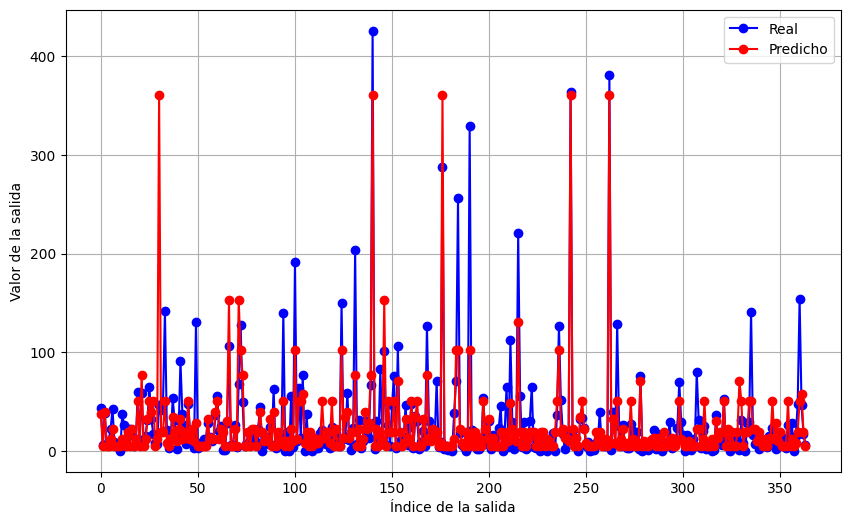

In [67]:
import matplotlib.pyplot as plt

# Constructor
model = DecisionTreeRegressor(max_depth = final_depth)

# Entrenar y predecir
model.fit(X_train_val[final_features], y_train_val)
y_pred_val = model.predict(X_val[final_features])

# Calcular MAE
mae = mean_absolute_error(y_val, y_pred_val)
print(f'MAE: {mae}')

# Obtener el índice de la salida
indices = range(len(y_val))

# Crear el diagrama
plt.figure(figsize=(10, 6))
plt.plot(indices, y_val, marker='o', linestyle='-', color='blue', label='Real')  # Puntos reales en azul
plt.plot(indices, y_pred_val, marker='o', linestyle='-', color='red', label='Predicho')  # Puntos predichos en rojo
plt.xlabel('Índice de la salida')
plt.ylabel('Valor de la salida')
plt.legend()  # Mostrar leyenda para identificar las líneas
plt.grid(True)
plt.show()

In [61]:
# Constructor
model = DecisionTreeRegressor(max_depth = final_depth)

# Entrenar y predecir
model.fit(X_train[final_features], y_train)
y_pred = model.predict(X_test[final_features])

y_pred

array([ 28.08333333,  72.        ,  28.08333333,  28.08333333,
        28.08333333,  28.08333333,  28.08333333,  28.08333333,
        28.08333333,  28.08333333,  20.11682243,  28.08333333,
        20.11682243,  28.08333333,  28.08333333,  72.        ,
        65.93333333,  65.93333333,  28.08333333,  28.08333333,
        65.93333333,  65.93333333,  65.93333333,  28.08333333,
        28.08333333,  65.93333333,  28.08333333,  28.08333333,
        65.93333333,  65.93333333, 377.        ,  28.08333333,
        65.93333333,  65.93333333,  28.08333333,  28.08333333,
        42.18604651,  28.08333333,  28.08333333,  42.18604651,
        28.08333333,  20.11682243,  28.08333333,  20.11682243,
        20.11682243,  28.08333333,  20.11682243,  28.08333333,
        28.08333333,  28.08333333,  28.08333333,  28.08333333,
        28.08333333,  72.        ,  28.08333333,  28.08333333,
        20.11682243,  28.08333333,  28.08333333,  28.08333333,
        28.08333333,  20.11682243,  28.08333333,  20.11

In [65]:
# Crear formato adecuado para las predicciones generadas

submission = pd.DataFrame({
    'city': X_test['city'],
    'year': X_test['year'],
    'weekofyear': X_test['weekofyear'],
    'total_cases': y_pred
})
submission['city'] = submission['city'].map({1: 'sj', 0: 'iq'})
submission['total_cases'] = submission['total_cases'].round().astype(int)

In [66]:
# Convertir dataframe a fichero .csv y descargar
from google.colab import files

submission.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>